# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1 - Part 6:

In this part, we will apply some of NLP techniques on a dataset containing Wikipedia texts ($\texttt{WikipediaEvents.csv}$ file). The primary goal of this part is to demonstrate how various NLP techniques can be effectively utilized in data science to process and analyze textual data.


### Import libraries

In [69]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from minisom import MiniSom

### Adjusting row column settings

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading dataset

In [3]:
df = pd.read_csv("WikipediaEvents.csv", index_col=0)
print("shape of dataset: {}" .format(df.shape))
df.head()

shape of dataset: (473, 1)


,text
0,"January 1, 2022 – The Regional Comprehensive E..."
1,"January 2, 2022 – Abdalla Hamdok resigns as Pr..."
2,"January 4, 2022 – The five permanent members o..."
3,"January 5, 2022 – A nationwide state of emerge..."
4,"January 6, 2022 – The CSTO deploys a ""peacekee..."


## Text preprocessing

In [4]:
df["text"]

0      January 1, 2022 – The Regional Comprehensive E...
1      January 2, 2022 – Abdalla Hamdok resigns as Pr...
2      January 4, 2022 – The five permanent members o...
3      January 5, 2022 – A nationwide state of emerge...
4      January 6, 2022 – The CSTO deploys a "peacekee...
                             ...                        
468    October, 2024 – 2024 Georgian presidential ele...
469     November, 2024 – 2024 Namibian general election.
470    November, 2024 – 2024 Romanian presidential el...
471    November, 2024 – Lee Hsien Loong, Prime Minist...
472    December, 2024 – 2024 Croatian presidential el...
Name: text, Length: 473, dtype: object

### 1. Lowercases, Punctuation, Numbers and Newline Characters

This function performs several cleaning operations on text data:
- Lowercases the text (Case Folding)
- Removes punctuation
- Removes numbers
- Removes newline characters

Parameters:
- text: A pandas Series containing text data.

Returns:
- Series: A pandas Series with cleaned text.

In [5]:
def clean_text(text):
    # lowercasing (Case Folding)
    text = text.str.lower()
    # removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text

In [6]:
df["text"] = clean_text(df["text"])
df["text"]

0      january    the regional comprehensive economic...
1      january    abdalla hamdok resigns as prime min...
2      january    the five permanent members of the u...
3      january    a nationwide state of emergency is ...
4      january    the csto deploys a peacekeeping mis...
                             ...                        
468            october    georgian presidential election
469                november    namibian general election
470           november    romanian presidential election
471    november   lee hsien loong prime minister of s...
472           december    croatian presidential election
Name: text, Length: 473, dtype: object

### 2. Stopwords Removal
This function filters out common stopwords from the text data. 
Stopwords are removed based on the NLTK's English stopwords list.

Parameters:
- text: A pandas Series containing text data.

Returns:
- Series: A pandas Series with stopwords removed from the text.

In [7]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
def remove_stopwords(text):
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [10]:
df["text"] = remove_stopwords(df["text"])
df["text"]

0      january regional comprehensive economic partne...
1      january abdalla hamdok resigns prime minister ...
2      january five permanent members un security cou...
3      january nationwide state emergency declared ka...
4      january csto deploys peacekeeping mission kaza...
                             ...                        
468               october georgian presidential election
469                   november namibian general election
470              november romanian presidential election
471    november lee hsien loong prime minister singap...
472              december croatian presidential election
Name: text, Length: 473, dtype: object

### 3. Tokenization

In [10]:
nltk.download('punkt')
df["text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /home/reza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [january, the, regional, comprehensive, econom...
1      [january, abdalla, hamdok, resigns, as, prime,...
2      [january, the, five, permanent, members, of, t...
3      [january, a, nationwide, state, of, emergency,...
4      [january, the, csto, deploys, a, peacekeeping,...
                             ...                        
468          [october, georgian, presidential, election]
469              [november, namibian, general, election]
470         [november, romanian, presidential, election]
471    [november, lee, hsien, loong, prime, minister,...
472         [december, croatian, presidential, election]
Name: text, Length: 473, dtype: object

### 4. Word to vector embeddings using GloVe pretrained model

This function converts each word in the text to its corresponding vector representation
using a pre-trained GloVe model. If a word is not in the model's vocabulary, it is ignored.

Parameters:
- text: The text to convert.

Returns:
- list: A list of vectors representing the words in the text.


In [11]:
# load glove pretrained model
PATH_in = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.6B.100d.txt"
PATH_out = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.word2vec.txt"

glove2word2vec(PATH_in, PATH_out)

glove_model = KeyedVectors.load_word2vec_format(PATH_out, binary=False)

In [12]:
print(glove_model)

KeyedVectors<vector_size=100, 400000 keys>


In [13]:
def convert_to_vector(text):
    return [glove_model[word] for word in text.split() if word in glove_model]

In [14]:
df["vectors"] = df['text'].apply(convert_to_vector)
df.to_csv("word2vec_out.csv", index=False)
df["vectors"]

0      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
1      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
2      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
3      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
4      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
                             ...                        
468    [[0.41278, -0.76503, -0.28583, -0.04694, 0.315...
469    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
470    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
471    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
472    [[0.48232, -0.76519, -0.30619, -0.027161, 0.25...
Name: vectors, Length: 473, dtype: object

In [15]:
data = df.values
print(data.shape)
# data

(473, 2)


### Visualize vector representation

In [44]:
# extract the word vectors and their corresponding words
words = []
vectors = []
for _, row in df.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words.append(word)
        vectors.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors = np.array(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# vrctors_2d = vectors.reshape(-1, 2)



In [45]:
from nltk.tokenize import word_tokenize
sample_questions = [
                        "Who won the 2022 soccer world cup?",
                        "When did Sweden join NATO?",
                        "Who joined NATO in 2023?",
                        "Who joined NATO in 2024?",
                        "Which is the 31st member of NATO?",
                        "Which is the 32nd member of NATO?",
                        "Who won the Cricket World Cup in 2023?",
                        "Who defeated India in Cricket World Cup final in 2023?",
                        "Name the former prime minister of Japan that was assassinated in 2022?",
                        "When did Chandrayaan-3 land near the south pole of the Moon?",
                        "Where did Chandrayaan-3 land on the Moon?",
                        "Who acquired Twitter in 2022?",
                        "Who owns Twitter?",
                        "Who acquired Activision Blizzard in 2023?"
                   ]

#print(len(sample_questions))

# tokenized questions
tokenized_questions = [word_tokenize(i) for i in sample_questions]
# print(len(tokenized_questions))

for i in tokenized_questions:
    print(i)

['Who', 'won', 'the', '2022', 'soccer', 'world', 'cup', '?']
['When', 'did', 'Sweden', 'join', 'NATO', '?']
['Who', 'joined', 'NATO', 'in', '2023', '?']
['Who', 'joined', 'NATO', 'in', '2024', '?']
['Which', 'is', 'the', '31st', 'member', 'of', 'NATO', '?']
['Which', 'is', 'the', '32nd', 'member', 'of', 'NATO', '?']
['Who', 'won', 'the', 'Cricket', 'World', 'Cup', 'in', '2023', '?']
['Who', 'defeated', 'India', 'in', 'Cricket', 'World', 'Cup', 'final', 'in', '2023', '?']
['Name', 'the', 'former', 'prime', 'minister', 'of', 'Japan', 'that', 'was', 'assassinated', 'in', '2022', '?']
['When', 'did', 'Chandrayaan-3', 'land', 'near', 'the', 'south', 'pole', 'of', 'the', 'Moon', '?']
['Where', 'did', 'Chandrayaan-3', 'land', 'on', 'the', 'Moon', '?']
['Who', 'acquired', 'Twitter', 'in', '2022', '?']
['Who', 'owns', 'Twitter', '?']
['Who', 'acquired', 'Activision', 'Blizzard', 'in', '2023', '?']


In [46]:
sample_questions_vector = np.array([])

for i in sample_questions:
    sample_questions_vector = np.append(sample_questions_vector, convert_to_vector(i))


print(sample_questions_vector.shape)
print(sample_questions_vector)

(5400,)
[ 0.76222003  0.4244      0.52142    ... -0.074273    0.75808001
 -0.34243   ]


In [47]:
word2vec_output_file = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.word2vec.txt"

glove_model_question = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Create a DataFrame with sample questions
df_question = pd.DataFrame({"text": sample_questions})

# Apply the convert_to_vector function to each question
df_question["vectors"] = df_question["text"].apply(convert_to_vector)

# Save the DataFrame to a CSV file
df_question.to_csv("sample_questions_vector.csv", index=False)

# Print the vectors for each question
print(df_question["vectors"])

0     [[0.76222, 0.4244, 0.52142, -0.17333, 0.88267,...
1     [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
2     [[-0.12698, -0.093075, -0.9536, -0.55698, 0.51...
3     [[-0.12698, -0.093075, -0.9536, -0.55698, 0.51...
4     [[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...
5     [[-0.54264, 0.41476, 1.0322, -0.40244, 0.46691...
6     [[0.76222, 0.4244, 0.52142, -0.17333, 0.88267,...
7     [[-0.55123, -0.071932, 0.64235, -0.40988, 0.35...
8     [[-0.038194, -0.24487, 0.72812, -0.39961, 0.08...
9     [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
10    [[0.30449, -0.19628, 0.20225, -0.61687, -0.684...
11    [[0.91016, -0.32978, -0.1976, 0.26211, 0.52823...
12    [[0.50264, -0.066676, 0.066302, -0.0039705, 0....
13    [[0.91016, -0.32978, -0.1976, 0.26211, 0.52823...
Name: vectors, dtype: object


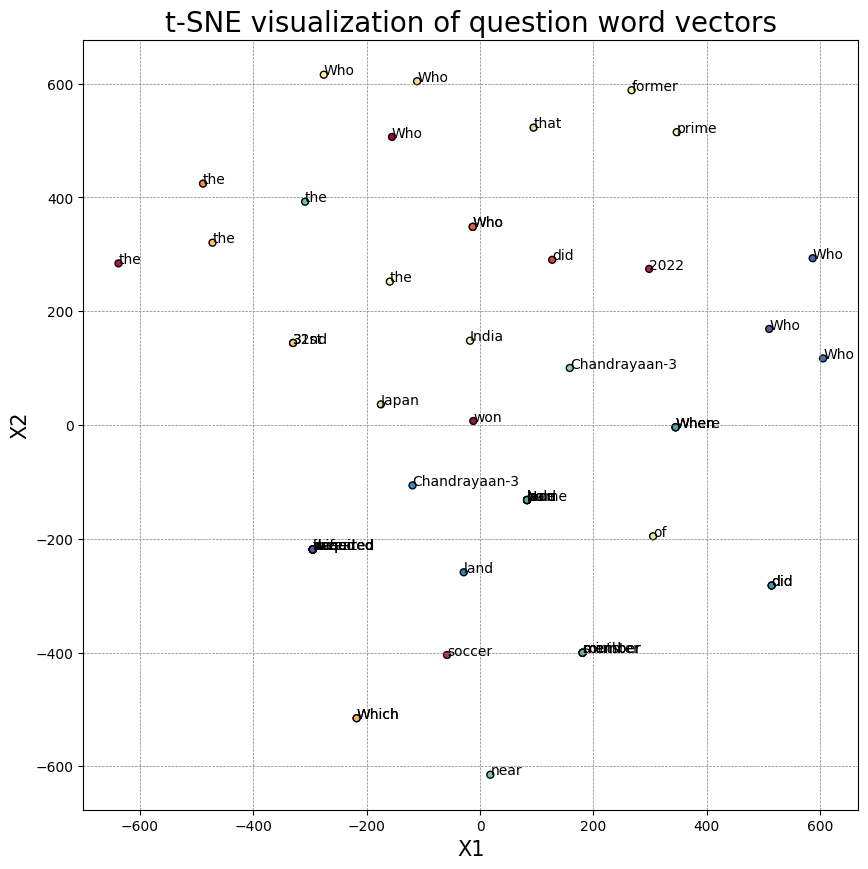

In [48]:
# extract the word vectors and their corresponding words
words_question = []
vectors_question = []
for _, row in df_question.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words_question.append(word)
        vectors_question.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors_question = np.array(vectors_question)
tsne_question = TSNE(n_components=2, random_state=0)
vectors_2d_question = tsne.fit_transform(vectors_question)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d_question)))
plt.scatter(vectors_2d_question[:, 0], vectors_2d_question[:, 1], edgecolors='k', c=colors, alpha=1, marker='.', s=100)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

for word, (x, y) in zip(words_question, vectors_2d_question):
    plt.text(x, y, word, fontsize=10)

plt.title("t-SNE visualization of question word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

### plot cluster for each question

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 158.81370066437225


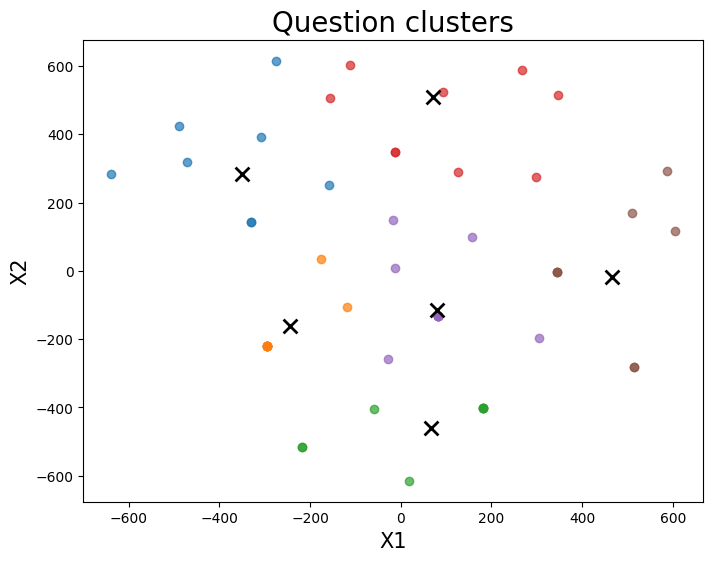

In [49]:
som_shape = (2, 3)
som = MiniSom(som_shape[0], som_shape[1], vectors_2d_question.shape[1], sigma=0.5, learning_rate=0.5,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(vectors_2d_question, 50000, verbose=True)

winner_coordinates = np.array([som.winner(x) for x in vectors_2d_question]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(8, 6))
for c in np.unique(cluster_index):
    plt.scatter(vectors_2d_question[cluster_index == c, 0],
                vectors_2d_question[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)
    plt.title("Question clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=100, linewidths=2, color='k', label='centroid')

In [57]:
print(df_question["vectors"].shape)
print(len(df_question["vectors"][0]))
print(df_question["vectors"][0][0].shape)


df_question["vectors"][0][0]

(14,)
5
(100,)


array([ 0.76222  ,  0.4244   ,  0.52142  , -0.17333  ,  0.88267  ,
       -0.34731  ,  0.56977  ,  0.56831  , -1.1566   , -0.1112   ,
        0.65045  , -0.327    , -0.59486  , -0.11525  , -0.61917  ,
       -0.26306  ,  0.099659 ,  0.19816  , -0.029884 ,  0.51016  ,
        1.0697   ,  0.43445  ,  0.73357  ,  0.4988   ,  0.7165   ,
       -0.68969  , -0.17862  , -0.82457  ,  1.2123   , -1.0012   ,
       -0.10805  ,  0.79784  , -0.0074444,  0.31013  ,  0.52086  ,
       -0.33906  , -0.24449  ,  1.4257   , -1.3048   ,  0.64268  ,
       -0.064299 , -0.52785  ,  0.24627  , -0.71255  ,  0.15777  ,
       -0.37284  ,  0.76634  , -0.83944  ,  0.38903  , -0.72386  ,
       -1.0251   , -0.39154  ,  0.77334  ,  1.0487   ,  0.077734 ,
       -2.3149   ,  0.22371  ,  0.60979  ,  0.45228  ,  0.28971  ,
       -0.1929   ,  0.023149 , -0.74615  ,  0.7548   ,  0.62112  ,
       -0.034022 ,  0.016985 ,  1.0178   , -0.14847  ,  0.47618  ,
       -0.18533  ,  0.8837   , -0.76806  ,  0.42934  , -0.4407

### resize questions dataframe

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing.sequence import pad_sequences

vectors_question_list = df_question["vectors"].tolist()
vectors_question_list_padded = pad_sequences(vectors_question_list, padding='post')
vectors_question = np.array(vectors_question_list_padded)

print(vectors.shape)
print(vectors_question.shape)

(11239, 100)
(14, 9, 100)


### Calculate cosine similarity between input dataset and question dataset

In [68]:
vectors_question_2d = vectors_question.reshape(-1, vectors_question.shape[-1])

cos_sim = cosine_similarity(vectors, vectors_question_2d)

print("maximum cosine similarity is: ", cos_sim.max())
print("minimum cosine similarity is: ", cos_sim.min())
print('-'*50)
print(cos_sim)

maximum cosine similarity is:  0.7874722035488095
minimum cosine similarity is:  -0.509642610657858
--------------------------------------------------
[[ 0.43380143  0.55897001  0.01306567 ...  0.          0.
   0.        ]
 [ 0.46714767  0.74748072 -0.01150365 ...  0.          0.
   0.        ]
 [ 0.29249495  0.53389831  0.15125115 ...  0.          0.
   0.        ]
 ...
 [ 0.18637699  0.20286848 -0.1090457  ...  0.          0.
   0.        ]
 [ 0.42644385  0.50590687  0.1077436  ...  0.          0.
   0.        ]
 [ 0.43460016  0.53521315  0.10645972 ...  0.          0.
   0.        ]]
